<a href="https://colab.research.google.com/github/FiyinfobaO/used_cars_price_prediction/blob/master/data_EDA_used_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###**Exploratory Data Analysis(EDA)**

In [ ]:
# Copying dataset from drive to colab current directory
!cp '/content/drive/MyDrive/cleaned_used_cars.csv' '/content/'

In [ ]:
# read the csv
df = pd.read_csv('cleaned_used_cars.csv')

In [ ]:
df.head()

,manufacturer,model,year,mileage,selling_condition,grade,fuel,transmission,color,price
0,Toyota,Land Cruiser,2020,2197,Nigerian used,A,Petrol,Automatic,black,33000000
1,Acura,Mdx,2008,105242,Nigerian used,D,Petrol,Automatic,grey,2586000
2,Toyota,Highlander,2001,152321,Nigerian used,C,Petrol,Automatic,green,1914000
3,Ford,Explorer,2014,60187,Nigerian used,C,Petrol,Automatic,brown,4154000
4,Kia,Cerato,2007,0,Nigerian used,E,Petrol,Manual,gold,738000


#####Looking at the Target variable(Price)

In [ ]:
# checking mean and median values
df['price'].describe()

count    2.889000e+03
mean     3.202779e+06
std      4.970045e+06
min      2.450000e+05
25%      1.145000e+06
50%      2.000000e+06
75%      3.594000e+06
max      1.552500e+08
Name: price, dtype: float64

As we can see above, the mean is higher than the median which means the price data is right/positively skewed. This means that most of the datapoints lie on the left side so the price data will have more of lower price values and may have some outliers in the higher price values

In [ ]:
sns.set(style='white')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


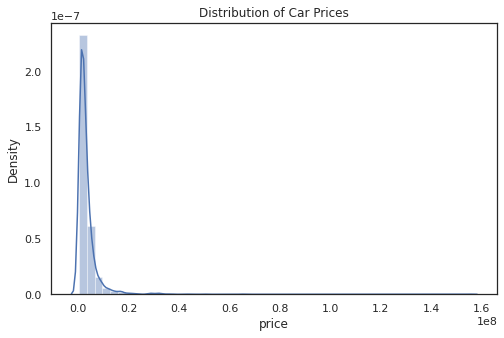

In [ ]:
# checking the distribution of price with distplot
plt.figure(figsize=(8,5))
sns.distplot(df.price).set_title('Distribution of Car Prices')
plt.show()

The price data is positively skewed as seen above.
To get a better understanding, We'll plot data points less than 0.4(40,000,000naira)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


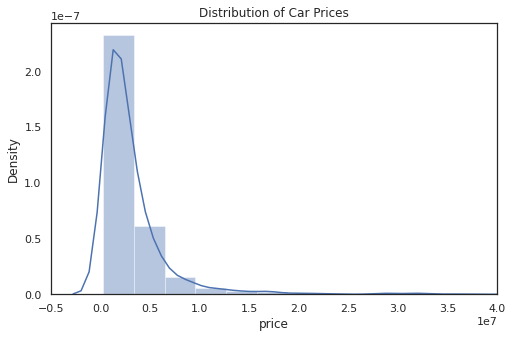

In [ ]:
# checking the distribution of price with distplot
fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(df.price, ax=ax).set_title('Distribution of Car Prices')
ax.set_xlim(-5000000,40000000)
plt.show()

The plot shows that most of the car prices range from 1million - 4million Naira

We will use boxplot to check for outliers.

#####Checking for outliers in price column

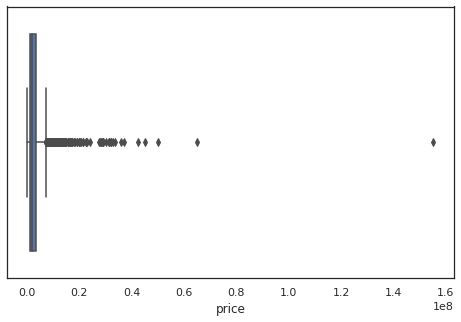

In [ ]:
# boxplot showing outliers in price column
plt.figure(figsize=(8,5))
sns.boxplot(x = df['price'] )

The boxplot shows the presence of outliers which we will remove using IQR method

In [ ]:
# removing outliers from the price column using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)

-2528500.0 7267500.0


In [ ]:
outliers = df[(df.price < lower_bound) | (df.price > upper_bound)]

In [ ]:
outliers

,manufacturer,model,year,mileage,selling_condition,grade,fuel,transmission,color,price
0,Toyota,Land Cruiser,2020,2197,Nigerian used,A,Petrol,Automatic,black,33000000
37,Ford,Explorer,2013,156239,Foreign used,C,Petrol Electric,Automatic,black,7290000
65,Toyota,Land Cruiser Prado,2012,204490,Nigerian used,D,Petrol,Automatic,black,13450000
80,Mercedes-Benz,Ml350,2013,102445,Foreign used,C,Petrol,Automatic,wine,13002000
112,Mercedes-Benz,GL400,2013,63085,Nigerian used,D,Petrol,Automatic,black,15690000
...,...,...,...,...,...,...,...,...,...,...
2819,BMW,X6,2008,49598,Nigerian used,C,Petrol,Automatic,silver,9911000
2831,Suzuki,Vitara,2019,1,New,A,Petrol,Automatic,gold,13000000
2870,Mercedes-Benz,S550,2010,52231,Foreign used,B,Petrol,Automatic,black,13210000
2874,Mercedes-Benz,Ml350,2013,85242,Foreign used,E,Petrol,Automatic,silver,9211500


In [ ]:
# new dataframe with price outliers dropped
df.drop(outliers.index, inplace=True)

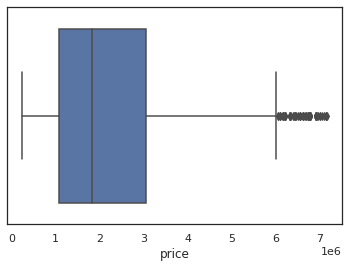

In [ ]:
# boxplot after removing outliers in price column
sns.boxplot(x = df['price'])

####Checking the Distribution of Mileage

In [ ]:
# looking at the mileage data
df.mileage.describe()

count    2.669000e+03
mean     1.505935e+05
std      1.037536e+05
min      0.000000e+00
25%      9.254000e+04
50%      1.394980e+05
75%      1.945940e+05
max      2.034555e+06
Name: mileage, dtype: float64

As we can see above, the mean is higher than the median which means the mileage data is right/positively skewed. This means that most of the datapoints lie on the left side so the mileage data will have more cars of lower mileage kilometer values.

It also shows that some cars have a mileage value of 0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


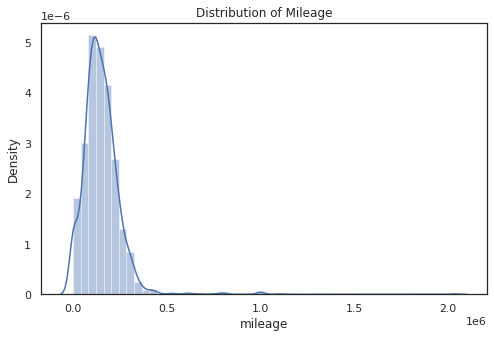

In [ ]:
# checking the distribution of mileage with distplot
plt.figure(figsize=(8,5))
sns.distplot(df.mileage).set_title('Distribution of Mileage')
plt.show()

The distplot above confirms the data is positively skewed and it shows most of the cars have odometer values between 100000km - 300000km

Lets observe the data points with a mileage of 0

In [ ]:
df[df['mileage']==0]

,manufacturer,model,year,mileage,selling_condition,grade,fuel,transmission,color,price
4,Kia,Cerato,2007,0,Nigerian used,E,Petrol,Manual,gold,738000
67,Toyota,Camry,2008,0,Nigerian used,E,Petrol,Automatic,black,1802000
228,Mitsubishi,Pajero,2008,0,Nigerian used,D,Petrol,Automatic,black,2250000
251,Jeep,Cherokee,2005,0,Nigerian used,D,Petrol,Automatic,blue,5610000
262,Nissan,Pathfinder,2002,0,Nigerian used,D,Petrol,Automatic,silver,794000
...,...,...,...,...,...,...,...,...,...,...
2824,Toyota,Avalon,2006,0,Nigerian used,D,Petrol,Automatic,black,1110000
2836,Peugeot,406,2000,0,Nigerian used,D,Petrol,Manual,red,396000
2862,Mercedes-Benz,E320,2002,0,Nigerian used,D,Petrol,Automatic,grey,1771000
2876,Toyota,Highlander,2004,0,Foreign used,D,Petrol,Automatic,silver,2300000


In [ ]:
# Observing the selling condition of cars that have odometer value of 0
df[df['mileage']==0]['selling_condition'].value_counts()

Nigerian used    75
Foreign used      9
Name: selling_condition, dtype: int64

In [ ]:
# Observing the grade of cars that have mileage value of 0
df[df['mileage']==0]['grade'].value_counts()

D    43
E    27
C    14
Name: grade, dtype: int64

**Since mileage value can't be 0 except if its a new car and from the analysis shown above, 2 of the mileage values of 0 are for new cars; We can also see that the most cars with mileage of 0 are grade C,D and E cars which isn't logically possible so we remove the rows with mileage of 0**

Lets observe the data points with a mileage of less than 10km


In [ ]:
df[df.mileage<10]

,manufacturer,model,year,mileage,selling_condition,grade,fuel,transmission,color,price
4,Kia,Cerato,2007,0,Nigerian used,E,Petrol,Manual,gold,738000
67,Toyota,Camry,2008,0,Nigerian used,E,Petrol,Automatic,black,1802000
74,Mercedes-Benz,Ml350,2004,1,Nigerian used,D,Petrol,Automatic,silver,906000
194,Toyota,Rav4,2008,1,Nigerian used,E,Petrol,Automatic,grey,1690000
228,Mitsubishi,Pajero,2008,0,Nigerian used,D,Petrol,Automatic,black,2250000
...,...,...,...,...,...,...,...,...,...,...
2824,Toyota,Avalon,2006,0,Nigerian used,D,Petrol,Automatic,black,1110000
2836,Peugeot,406,2000,0,Nigerian used,D,Petrol,Manual,red,396000
2862,Mercedes-Benz,E320,2002,0,Nigerian used,D,Petrol,Automatic,grey,1771000
2876,Toyota,Highlander,2004,0,Foreign used,D,Petrol,Automatic,silver,2300000


In [ ]:
# Observing the selling condition of cars that have mileage value <10km
df[df.mileage<10]['selling_condition'].value_counts()

Nigerian used    95
Foreign used     11
New               2
Name: selling_condition, dtype: int64

In [ ]:
# Observing the grade of cars that have mileage value <10km
df[df.mileage<10]['grade'].value_counts()

D    57
E    33
C    16
A     2
Name: grade, dtype: int64

In [ ]:
df[df.mileage<10][df.selling_condition=='New']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,manufacturer,model,year,mileage,selling_condition,grade,fuel,transmission,color,price
2776,Suzuki,Alto,2019,1,New,A,Petrol,Manual,gold,4000000
2817,Suzuki,Swift,2019,1,New,A,Petrol,Manual,red,7000000


We will also remove any mileage value below 10km that isn't a *New* car or a car with grade A

In [ ]:
df.shape

(2669, 10)

In [ ]:
# removing cars with mileage <10 except if the car is 'New'

df_n = pd.DataFrame() # new df
count = 0

# loop through all the rows with mileage less than 10km
for i,v in enumerate(df[df.mileage<10]['selling_condition']):
  val = v
  if val == 'New':
    count += 1
    if count < 2:
      n = df[df.mileage<10].iloc[i] # save the row as a series
      d = df[df['mileage']>10] # get all the records with mileage > 10km 
      d = pd.concat([d, n.to_frame().T], ignore_index=True)
      df_n = pd.concat([df_n, d], ignore_index=True)
    else:
      n = df[df.mileage<10].iloc[i] # save the row as a series
      df_n = pd.concat([df_n, n.to_frame().T], ignore_index=True)
  else:
    pass
  

In [ ]:
df_n.tail(8)

,manufacturer,model,year,mileage,selling_condition,grade,fuel,transmission,color,price
2555,Toyota,Solara,2008,148221,Foreign used,D,Petrol,Automatic,silver,1578000
2556,Honda,Accord,2012,134811,Nigerian used,E,Petrol,Automatic,black,1538750
2557,Volkswagen,Jetta,2006,447448,Nigerian used,D,Petrol,Automatic,grey,1032500
2558,Lexus,Rx,2006,159386,Nigerian used,D,Hybrid,Automatic,grey,2045000
2559,Ford,Escape,2003,137494,Nigerian used,E,Petrol,Automatic,beige,682000
2560,Lexus,Rx 350,2008,75437,Nigerian used,D,Petrol,Automatic,green,3146000
2561,Suzuki,Alto,2019,1,New,A,Petrol,Manual,gold,4000000
2562,Suzuki,Swift,2019,1,New,A,Petrol,Manual,red,7000000


In [ ]:
df_n.shape

(2563, 10)

In [ ]:
# to see if there are duplicate rows
df_n.duplicated().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


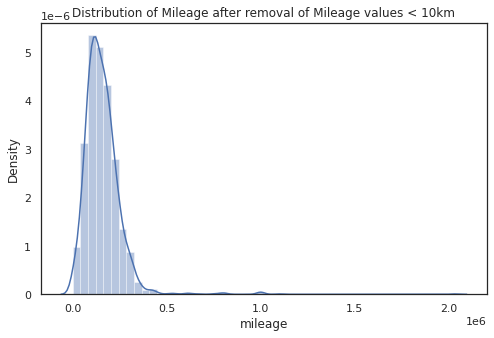

In [ ]:
# checking the distribution of mileage with distplot
plt.figure(figsize=(8,5))
sns.distplot(df_n.mileage).set_title('Distribution of Mileage after removal of Mileage values < 10km')
plt.show()

The distribution is still positively skewed. Lets check for outliers using boxplot

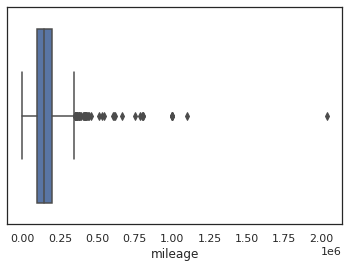

In [ ]:
# boxplot before removing outliers in mileage column
sns.boxplot(x = df_n['mileage'])

The boxplot shows the presence of outliers which we will remove using IQR method

In [ ]:
# removing outliers from the mileage column using IQR
Q1 = df_n['mileage'].quantile(0.25)
Q3 = df_n['mileage'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)

-50539.5 346448.5


In [ ]:
outliers = df_n[(df_n.mileage < lower_bound) | (df_n.mileage > upper_bound)]

In [ ]:
# view outliers
outliers

,manufacturer,model,year,mileage,selling_condition,grade,fuel,transmission,color,price
25,Nissan,Pulsar,2004,437854,Nigerian used,D,Petrol,Automatic,wine,346000
87,Mercedes-Benz,Sprinter,2001,604158,Nigerian used,D,Diesel,Automatic,white,4490000
114,Honda,Accord,2008,411658,Nigerian used,D,Petrol,Automatic,black,1410000
138,Nissan,Maxima,2004,751123,Nigerian used,E,Petrol,Automatic,blue,682000
293,Peugeot,607,2004,999999,Nigerian used,D,Petrol,Manual,black,906000
302,Lexus,Rx 300,2000,366309,Nigerian used,D,Petrol,Automatic,gold,1914000
460,Jaguar,Xk,2007,999999,Nigerian used,C,Petrol,Automatic,silver,3395000
559,Toyota,Solara,2004,375992,Foreign used,D,Petrol,Automatic,white,2138000
694,Dodge,Caravan,2004,356964,Nigerian used,E,Petrol,Automatic,blue,695000
728,Hyundai,Genesis,2012,619358,Nigerian used,C,Petrol,Automatic,white,3034000


In [ ]:
# removing the outliers
df_n = df_n.drop(outliers.index)

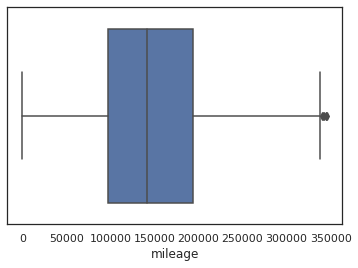

In [ ]:
# boxplot after removing outliers in mileage column
sns.boxplot(x = df_n['mileage'])

The plot above shows we've been able to remove all outliers from the mileage data column

In [ ]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2512 entries, 0 to 2562
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   manufacturer       2512 non-null   object
 1   model              2512 non-null   object
 2   year               2512 non-null   object
 3   mileage            2512 non-null   object
 4   selling_condition  2512 non-null   object
 5   grade              2512 non-null   object
 6   fuel               2512 non-null   object
 7   transmission       2512 non-null   object
 8   color              2512 non-null   object
 9   price              2512 non-null   object
dtypes: object(10)
memory usage: 215.9+ KB


In [ ]:
# put mileage, price and year in proper datatype
df_n.year = df_n.year.astype(int)
df_n.price = df_n.price.astype(int)
df_n.mileage = df_n.mileage.astype(int)

In [ ]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2512 entries, 0 to 2562
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   manufacturer       2512 non-null   object
 1   model              2512 non-null   object
 2   year               2512 non-null   int64 
 3   mileage            2512 non-null   int64 
 4   selling_condition  2512 non-null   object
 5   grade              2512 non-null   object
 6   fuel               2512 non-null   object
 7   transmission       2512 non-null   object
 8   color              2512 non-null   object
 9   price              2512 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 215.9+ KB


In [ ]:
df_n.describe()

,year,mileage,price
count,2512.000000,2512.000000,2.512000e+03
mean,2006.789411,148348.195064,2.324649e+06
std,4.574164,70039.500301,1.551852e+06
min,1990.000000,1.000000,2.450000e+05
25%,2004.000000,97322.750000,1.130000e+06
50%,2007.000000,141576.500000,1.876250e+06
75%,2010.000000,193802.750000,3.146000e+06
max,2020.000000,345675.000000,7.160000e+06


#####Mileage Vs Price

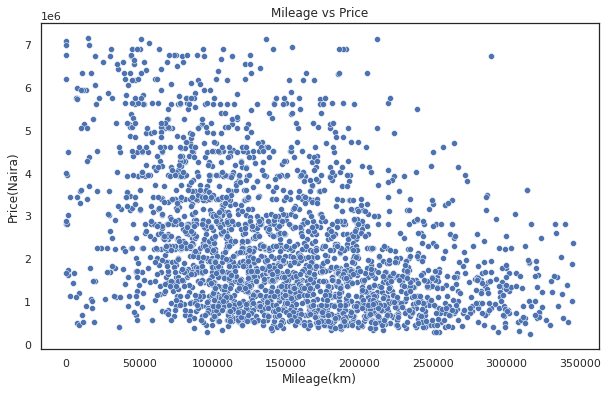

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='mileage', y='price', data=df_n)
plt.title('Mileage vs Price')
# Set x-axis label
plt.xlabel('Mileage(km)')
# Set y-axis label
plt.ylabel('Price(Naira)')
plt.show()

We can see that cars with low mileage are more expensive and as the mileage value increases, the price of the car reduces.

We can also see that the cars with a mileage value of 250000km and above have their prices falling less than 3milliion naira


####Looking at the Year feature

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


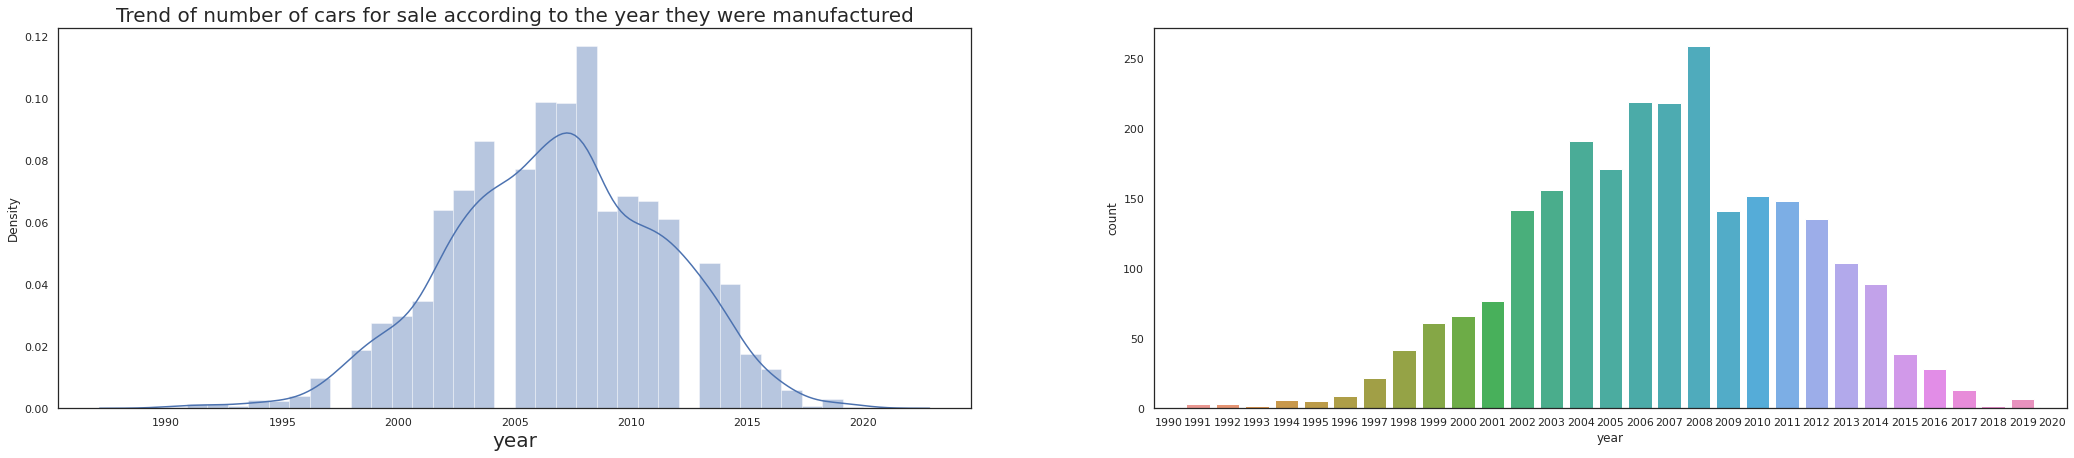

In [ ]:
# checking the distribution of year with distplot
plt.subplots(figsize=(36,7))
plt.subplot(121)
plot1 =sns.distplot(df_n.year)
plot1.axes.set_title('Trend of number of cars for sale according to the year they were manufactured', fontsize=20)
plot1.set_xlabel('year', fontsize=20)

plt.subplot(122)
sns.countplot(x='year', data=df_n)
plt.show()

From the plots above, we can see that the number of cars sold each year has been rising from 1990 until it fell in 2005 which was due to fuel shortages that happened that year. It then rose again all the way till 2008 which was the year that had the highest no of car sales.

After 2008, there has been a steady decrease in the volume of cars sold up until date.

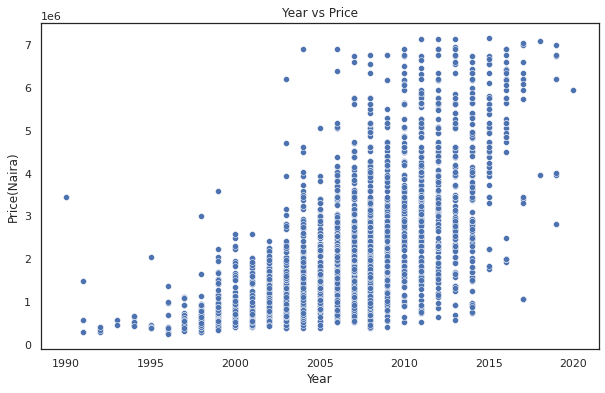

In [ ]:
# plot of year vs price
plt.figure(figsize=(10,6))
sns.scatterplot(x='year', y='price', data=df_n)
plt.title('Year vs Price')
# Set x-axis label
plt.xlabel('Year')
# Set y-axis label
plt.ylabel('Price(Naira)')
plt.show()

The scatter plot above shows that car prices have been increasing steadily and getting more expensive each year.

The high price of cars can be as a result of the scarcity of cars due to the descrease in cars sold in Nigeria with each passing year

#####Adding a new column 'car_age'

In [ ]:
# Using the age of cars
import datetime
current_time = datetime.datetime.now()
df_n['car_age'] = current_time.year - df_n['year']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


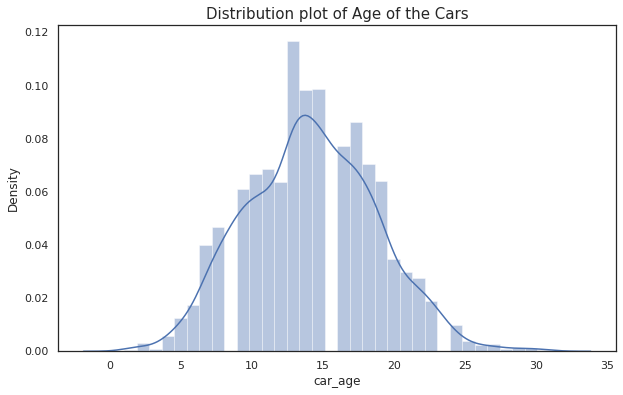

In [ ]:
# checking the distribution of car age with distplot
plt.figure(figsize=(10,6))
sns.distplot(df_n.car_age).set_title('Distribution plot of Age of the Cars', fontsize=15)
plt.show()

According to the plot, most cars are less than 20years old

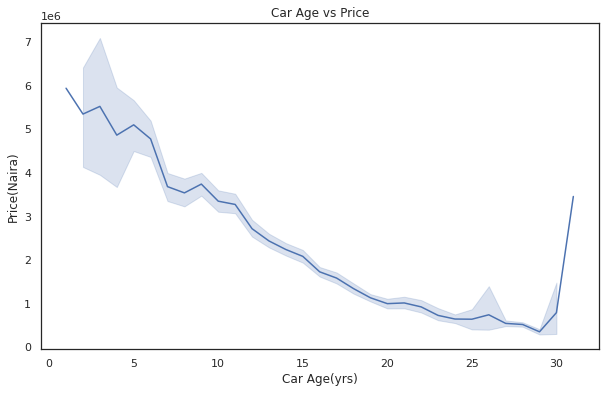

In [ ]:
# plot to see the distribution of car age with price
plt.figure(figsize=(10,6))
sns.lineplot(x='car_age', y='price', data=df_n)
plt.title('Car Age vs Price')
# Set x-axis label
plt.xlabel('Car Age(yrs)')
# Set y-axis label
plt.ylabel('Price(Naira)')
plt.show()

This plot tells us that as the car age increases, the price of the car reduces

####Looking at the Selling condition feature

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


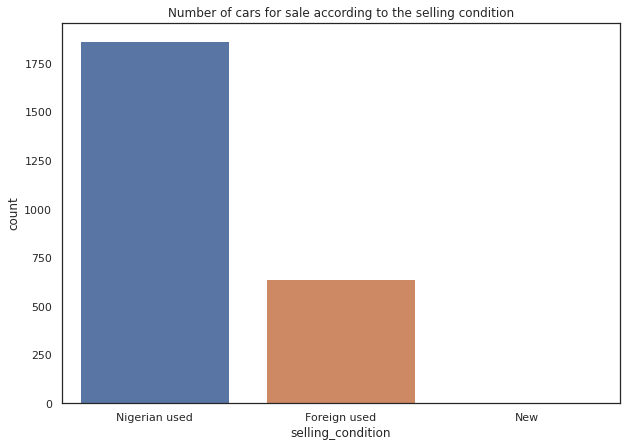

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(df_n.selling_condition).set_title('Number of cars for sale according to the selling condition')
plt.show()

Most cars for sale are **Nigerian used**

The *New* cars are soo small, it may not have an effect on our model. 

Since the problem scope is on **used** cars, We will need to drop all new cars

In [ ]:
# assign null value to car with new selling condition
df_n.selling_condition = df_n.selling_condition.replace('New', np.nan)

In [ ]:
df_n.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


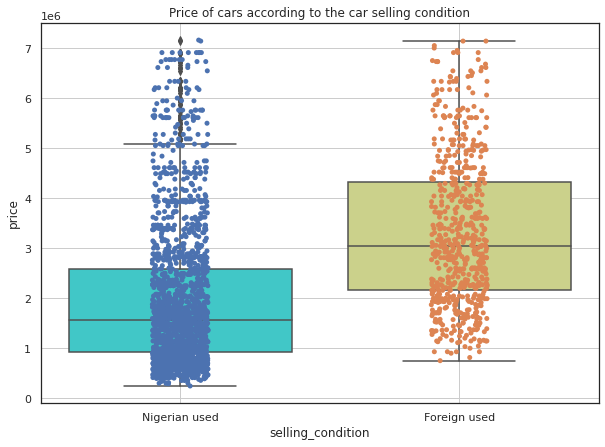

In [ ]:
# plot selling condition vs price
plt.figure(figsize=(10,7))
sns.boxplot(df_n.selling_condition, df_n.price, palette='rainbow').set_title('Price of cars according to the car selling condition')
sns.stripplot(df_n.selling_condition, df_n.price).set_title('Price of cars according to the car selling condition')
plt.grid()
plt.show()

Foreign used cars for sale are mostly within the 1-5 million naira price range

Nigerian used cars for sale are mostly within the 500k-3 million naira price range with some outlier cars in the range of 5-7 million naira


####Looking at the Grade feature

The grade of a car represent the condition of the car as at when it is sold to a buyer.

**Grade A** means the car is in *Excellent* condition

**Grade B** means the car is in *Very Good* condition with minor wear and tear

**Grade C** means the car is in *Good* condition with slight wear and tear. It may also need some repairs and refurbishments

**Grade D** means the car is in *Average* condition with wear and tear. It will need some repairs and refurbishment

**Grade E** means the car is in *Below Average* condition with major wear and tear. It will need some repairs and refurbishment

In [ ]:
df_n.grade.value_counts()

D    1039
C     880
E     558
B      29
Name: grade, dtype: int64

None of the cars are in excellent condition as there is no grade A car

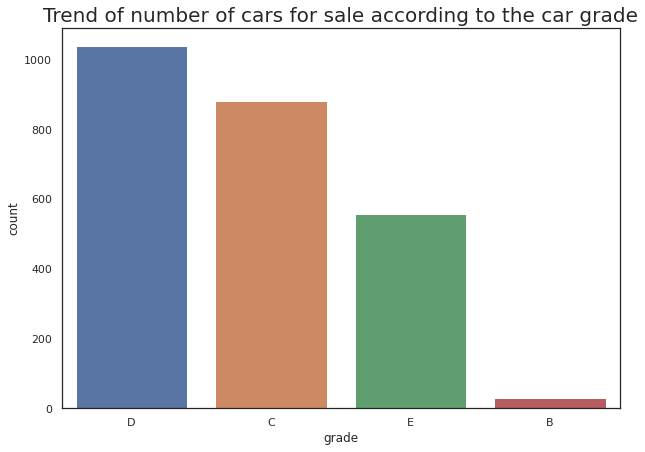

In [ ]:
# checking the distribution of car grade
plt.figure(figsize=(10,7))
sns.countplot(x='grade', data=df_n).set_title('Trend of number of cars for sale according to the car grade', fontsize=20)
plt.show()

This plot shows us that cars with  Very Good condition are sold for far less than Grade C, D & E which have worse conditions.

The majority of cars sold in Nigeria are grade C&D cars which means the cars are of Average condition and will need repairs and refurbishment.

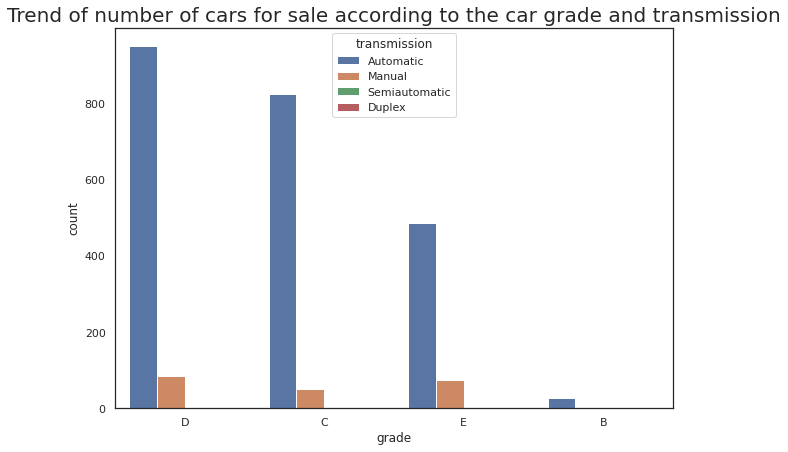

In [ ]:
# checking the distribution of car grade and transmission
plt.figure(figsize=(10,7))
sns.countplot(x='grade', hue='transmission', data=df_n).set_title('Trend of number of cars for sale according to the car grade and transmission', fontsize=20)
plt.show()

We can see that none of the grade b cars are manual and automatic transmission occupies majority of the cars in each grade sold in Nigeria




/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


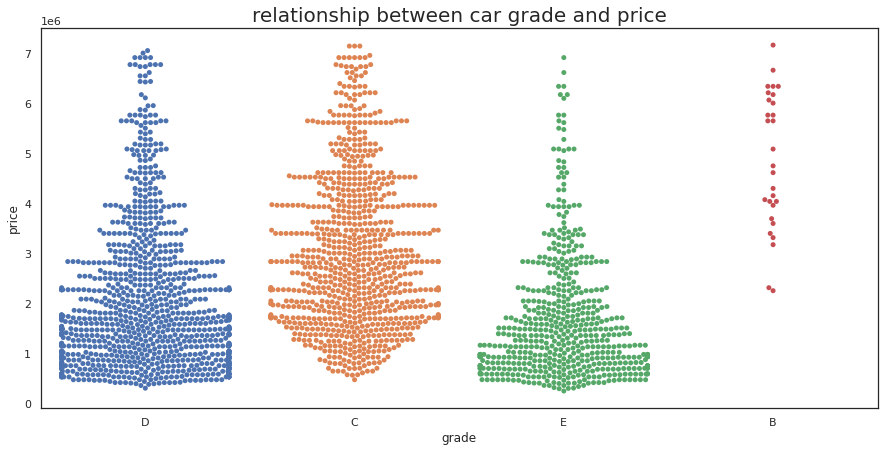

In [ ]:
# plot to show relationship between car grade and price
plt.figure(figsize=(15,7))
sns.swarmplot(y='price', x='grade', data=df_n).set_title('relationship between car grade and price', fontsize=20)
plt.show()

This plot tells us the following:

*   majority of the grade B cars are sold higher than 3 million naira. 
*   majority of the grade C cars are sold between 1 and 6 million naira. 
*   majority of the grade D cars are sold less than 4 million naira. 
*   majority of the grade E cars are sold less than 3 million naira.






####Looking at the Fuel feature

In [ ]:
df_n.fuel.value_counts()

Petrol             2468
Diesel               19
Hybrid               14
Petrol Electric       3
Electric              1
Petroleum Gas         1
Name: fuel, dtype: int64

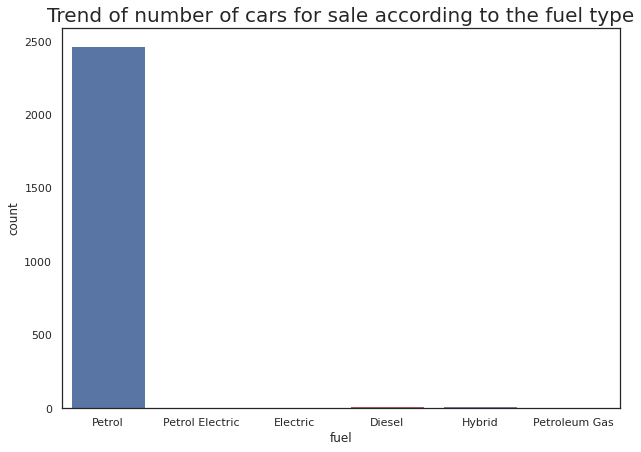

In [ ]:
# checking the distribution of fuel 
plt.figure(figsize=(10,7))
sns.countplot(x='fuel', data=df_n).set_title('Trend of number of cars for sale according to the fuel type', fontsize=20)
plt.show()

Our data shows us that most cars sold use **Petrol** as the fuel

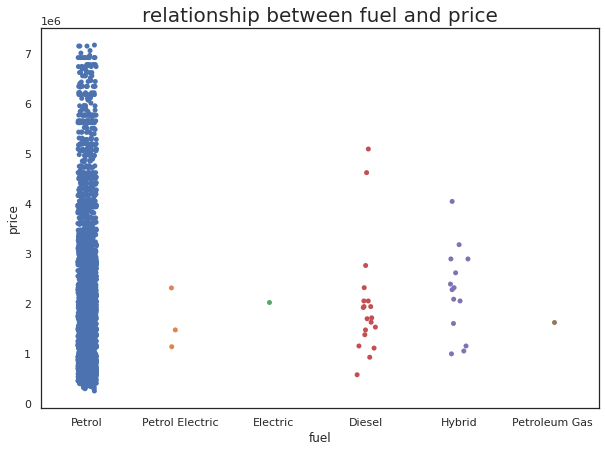

In [ ]:
# plot to show relationship between fuel type and price
plt.figure(figsize=(10,7))
sns.stripplot(y='price', x='fuel', data=df_n).set_title('relationship between fuel and price', fontsize=20)
plt.show()

The petrol cars are highly distributed below the 5 million naira price ranges with some cars above 5 million


####Looking at the manufacturer feature

In [ ]:
df_n.manufacturer.value_counts()[:15]

Toyota           752
Honda            308
Mercedes-Benz    222
Nissan           174
Lexus            170
Ford             130
Hyundai           99
Kia               80
Volkswagen        69
Acura             63
Land Rover        59
Peugeot           55
BMW               48
Infiniti          40
Mazda             39
Name: manufacturer, dtype: int64

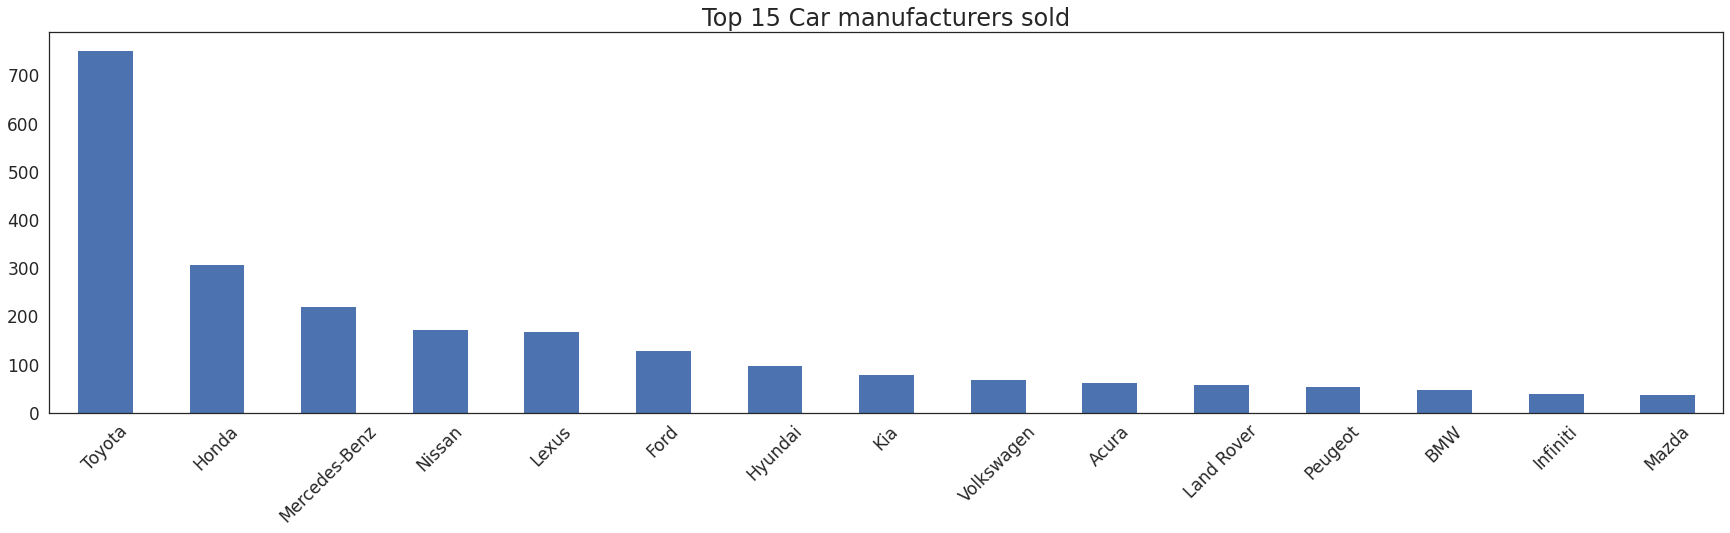

In [ ]:
# plot to show the top 15 car brands 
plt.figure(figsize=(30,7))
df_n['manufacturer'].value_counts()[:15].plot(kind='bar', fontsize=17, rot=45)
plt.title('Top 15 Car manufacturers sold', fontsize=24)
plt.show()

Toyota appears to be the leading car brand sold in Nigeria followed by Honda

In [ ]:
cheap_cars = df_n.groupby(['manufacturer'])['price'].mean().sort_values(ascending=True).head(15)
expensive_cars = df_n.groupby(['manufacturer'])['price'].mean().sort_values(ascending=False).head(15)

In [ ]:
cheap_cars

manufacturer
Ssangyong    5.825000e+05
Isuzu        6.515625e+05
Jaguar       7.525000e+05
Mercury      7.975000e+05
Skoda        8.990000e+05
Renault      9.363929e+05
Volvo        1.076100e+06
Foton        1.145000e+06
Chery        1.145000e+06
Peugeot      1.179827e+06
Opel         1.203333e+06
Suzuki       1.240028e+06
Citroen      1.257500e+06
Tata         1.322667e+06
Chrysler     1.343015e+06
Name: price, dtype: float64

In [ ]:
cheap_cars.index

Index(['Ssangyong', 'Isuzu', 'Jaguar', 'Mercury', 'Skoda', 'Renault', 'Volvo',
       'Foton', 'Chery', 'Peugeot', 'Opel', 'Suzuki', 'Citroen', 'Tata',
       'Chrysler'],
      dtype='object', name='manufacturer')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


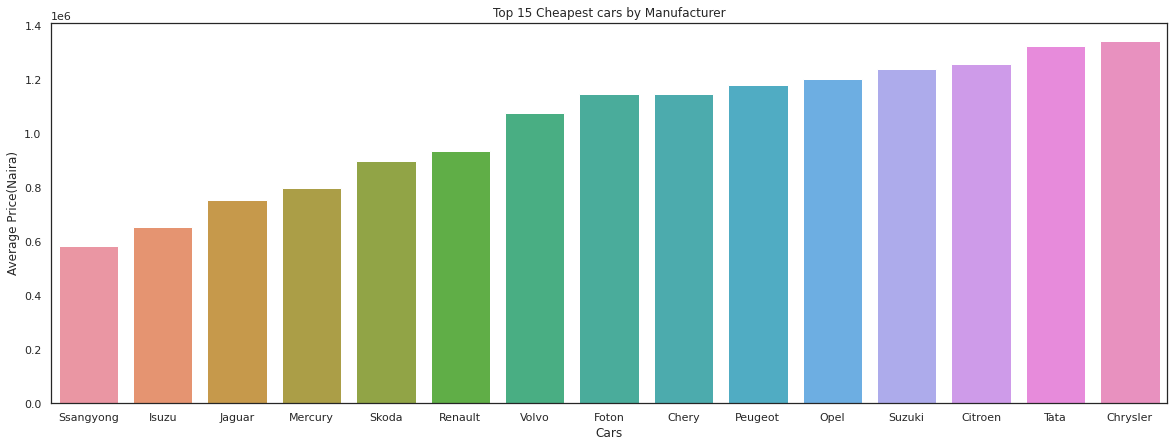

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(cheap_cars.index, cheap_cars.values)
plt.title('Top 15 Cheapest cars by Manufacturer')
plt.ylabel('Average Price(Naira)', fontsize=12)
plt.xlabel('Cars', fontsize=12)
plt.show()

In [ ]:
expensive_cars

manufacturer
GMC              5.162000e+06
Cadillac         4.925500e+06
GAC              3.679167e+06
Land Rover       3.339868e+06
Mercedes-Benz    3.214403e+06
Porsche          3.188000e+06
licoln           3.170000e+06
Hummer           3.046875e+06
BMW              2.773847e+06
Toyota           2.664077e+06
Lexus            2.630523e+06
Subaru           2.607500e+06
Ford             2.391579e+06
Mini             2.299500e+06
Hyundai          2.262606e+06
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


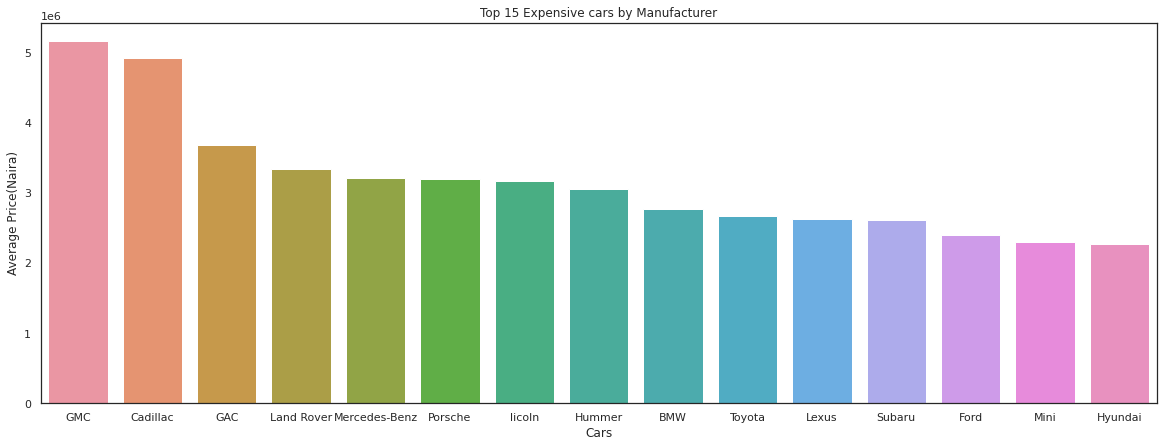

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(expensive_cars.index, expensive_cars.values)
plt.title('Top 15 Expensive cars by Manufacturer')
plt.ylabel('Average Price(Naira)', fontsize=12)
plt.xlabel('Cars', fontsize=12)
plt.show()

####Looking at the Model feature

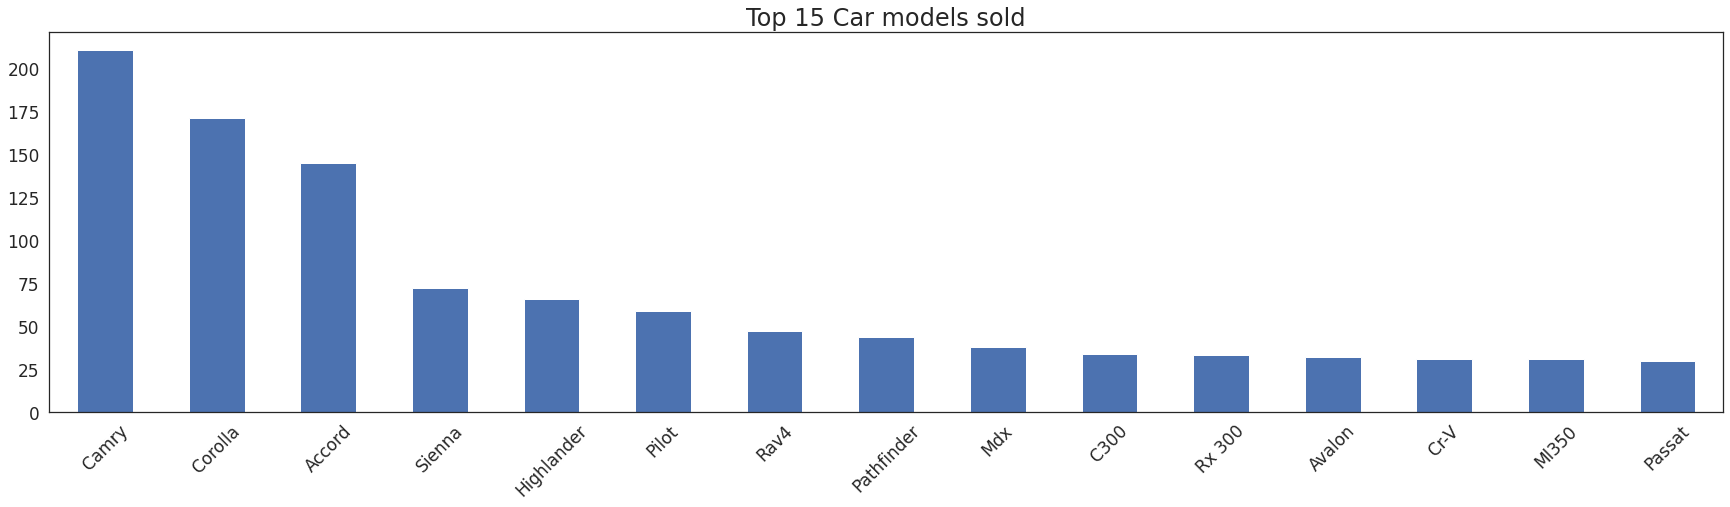

In [ ]:
# plot to show the top 15 car models 
plt.figure(figsize=(30,7))
df_n['model'].value_counts()[:15].plot(kind='bar', fontsize=17, rot=45)
plt.title('Top 15 Car models sold', fontsize=24)
plt.show()

We can see that the most sold *car model* is **Camry**

In [ ]:
gr = df_n.groupby(['model','manufacturer'])['model'].count().sort_values(ascending=False).head(15)
gr

model       manufacturer 
Camry       Toyota           211
Corolla     Toyota           171
Accord      Honda            145
Sienna      Toyota            72
Highlander  Toyota            66
Pilot       Honda             59
Rav4        Toyota            47
Pathfinder  Nissan            44
Mdx         Acura             38
C300        Mercedes-Benz     34
Rx 300      Lexus             33
Avalon      Toyota            32
Cr-V        Honda             31
Ml350       Mercedes-Benz     31
Passat      Volkswagen        30
Name: model, dtype: int64

In [ ]:
gr.index.get_level_values(0)

Index(['Camry', 'Corolla', 'Accord', 'Sienna', 'Highlander', 'Pilot', 'Rav4',
       'Pathfinder', 'Mdx', 'C300', 'Rx 300', 'Avalon', 'Cr-V', 'Ml350',
       'Passat'],
      dtype='object', name='model')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


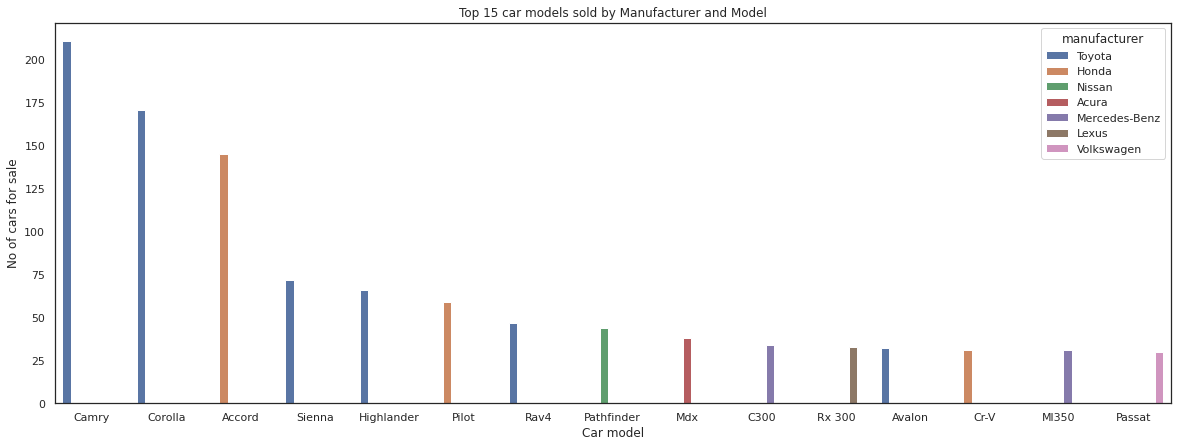

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(gr.index.get_level_values(0), gr.values, hue=gr.index.get_level_values(1))
plt.title('Top 15 car models sold by Manufacturer and Model')
plt.ylabel('No of cars for sale', fontsize=12)
plt.xlabel('Car model', fontsize=12)
plt.show()

From the plot above, we can see that 6 out of the 15 car models with the highest number of cars for sale are from the *Toyota* car manufacturer.

Also, the car model with the highest no of cars for sale is also a *Toyota* car

We can also see that the *camry* and *corolla* are the most sold car models. This comes as no surprise because the Corolla made its highest sale in Nigeria and the world in 1997, and since then **Toyota** has, for many years, remained the favourite car of many Nigerians because of its reliability, resale value and outstanding quality.

We will look at the distribution between car models and manufacturers with Price

In [ ]:
h = df_n.groupby(['manufacturer', 'model'])['price'].mean().sort_values(ascending=False).head(15)
h

manufacturer   model     
Mercedes-Benz  C63 Amg       6770000.0
Nissan         Kicks         6730000.0
Mercedes-Benz  GLA250        6611000.0
Hyundai        Creta         6488750.0
Mercedes-Benz  G500          6207500.0
               Glk350        5877000.0
Toyota         Fortuner      5860000.0
               Fj Cruiser    5760000.0
GAC            GS5           5645000.0
Mercedes-Benz  S550          5625000.0
Cadillac       Cts           5610000.0
Toyota         Tundra        5355750.0
Infiniti       Qx56          5185000.0
GMC            Acadia        5162000.0
Mazda          Mx-5 Miata    5050000.0
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


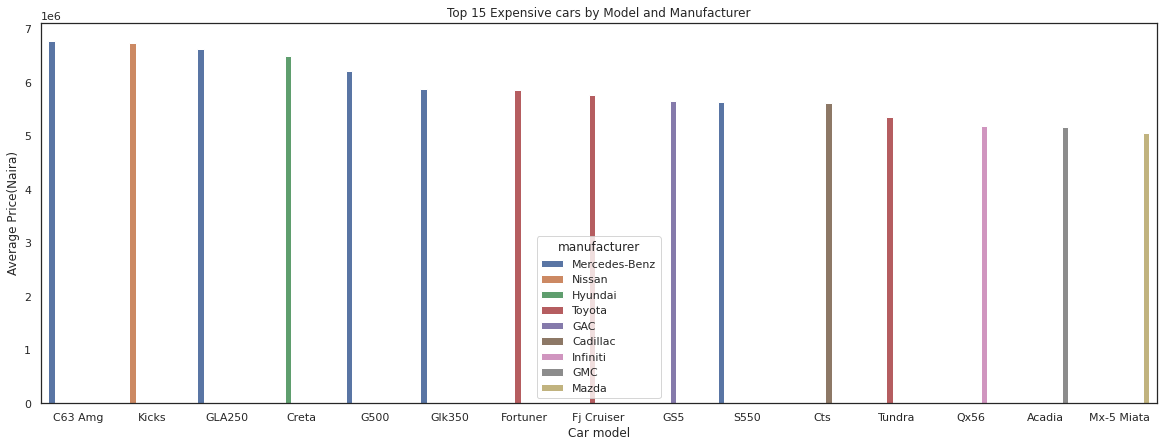

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(h.index.get_level_values(1), h.values, hue=h.index.get_level_values(0))
plt.title('Top 15 Expensive cars by Model and Manufacturer')
plt.ylabel('Average Price(Naira)', fontsize=12)
plt.xlabel('Car model', fontsize=12)
plt.show()

From the plot above, we can see that 5 out of the 15 car models with the highest average price are from the *Mercedes-Benz* car manufacturer.

Also, the most expensive car model is also a *Mercedes-Benz* car

####Looking at the *Color* feature

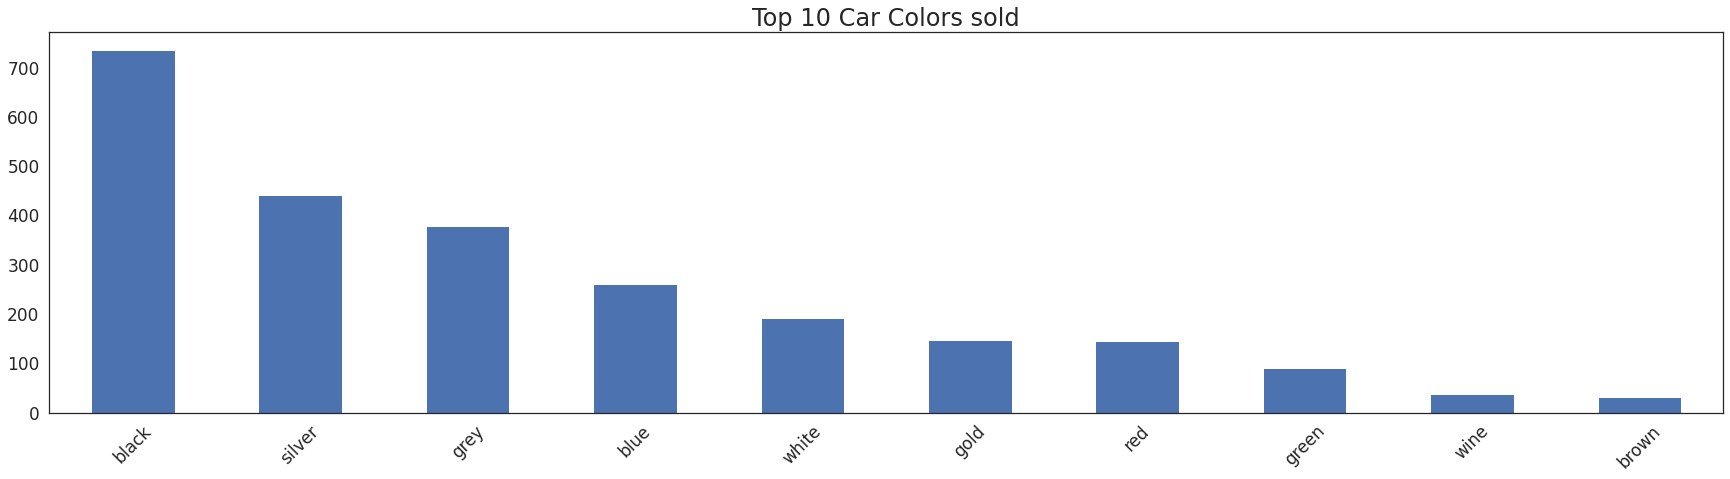

In [ ]:
# plot to show the top 10 car colors
plt.figure(figsize=(30,7))
df_n['color'].value_counts()[:10].plot(kind='bar', fontsize=17, rot=45)
plt.title('Top 10 Car Colors sold', fontsize=24)
plt.show()

Black colored cars are the most sold in Nigeria followed by Silver colored cars

In [ ]:
price_colors = df_n.groupby(['color'])['price'].mean().sort_values(ascending=False)
price_colors

color
opal sage    2.922000e+06
white        2.857971e+06
purple       2.639679e+06
sky blue     2.632800e+06
black        2.605055e+06
brown        2.494410e+06
grey         2.483248e+06
red          2.348303e+06
silver       2.086131e+06
ash          2.080706e+06
blue         1.990172e+06
wine         1.900599e+06
beige        1.864958e+06
gold         1.743690e+06
cream        1.656250e+06
orange       1.387950e+06
green        1.327603e+06
yellow       1.087000e+06
pink         9.060000e+05
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


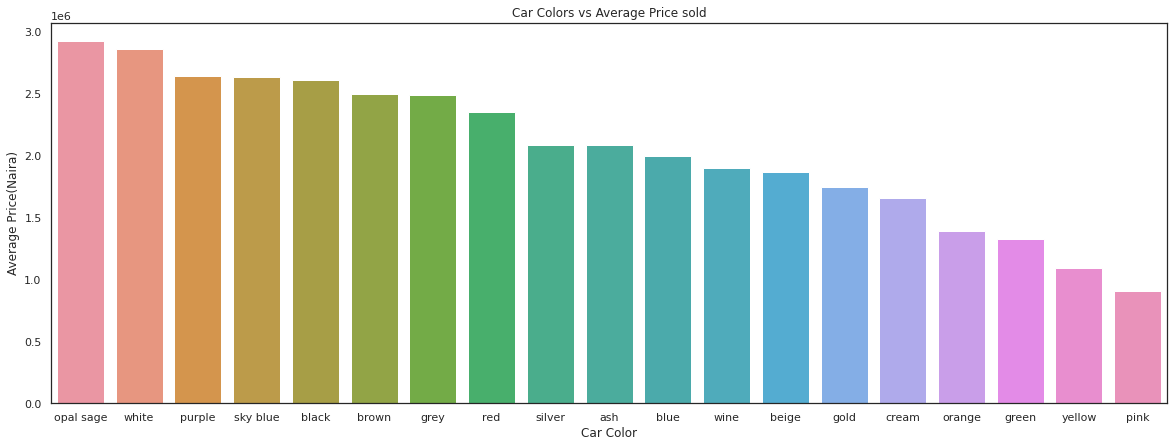

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(price_colors.index, price_colors.values)
plt.title('Car Colors vs Average Price sold')
plt.ylabel('Average Price(Naira)', fontsize=12)
plt.xlabel('Car Color', fontsize=12)
plt.show()

Opal sage and White colored cars are the most expensive cars in terms of the average price while pink colored cars has the least average price

####Looking at the Transmission feature

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


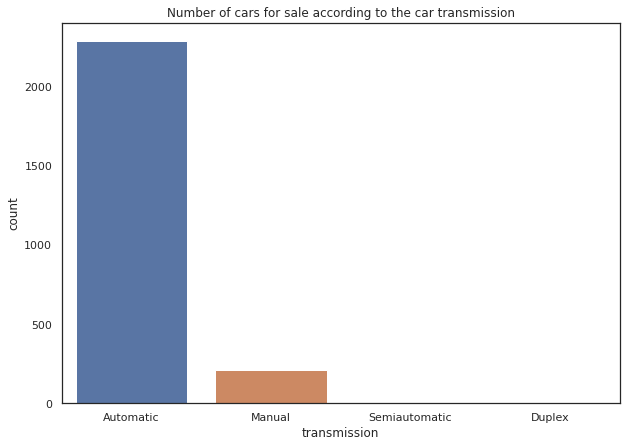

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(df_n.transmission).set_title('Number of cars for sale according to the car transmission')
plt.show()

The most sold cars in Nigeria are *Automatic*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


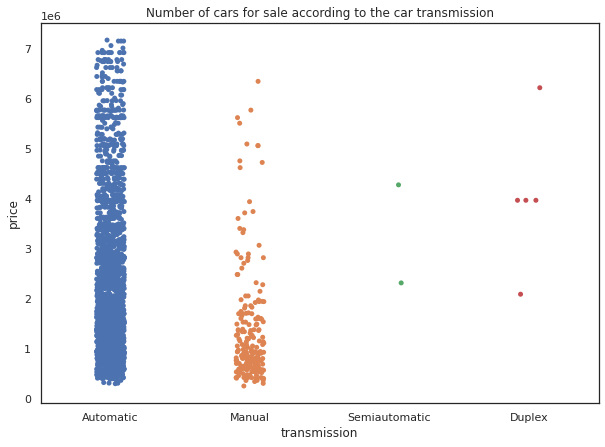

In [ ]:
plt.figure(figsize=(10,7))
sns.stripplot(df_n.transmission, df_n.price).set_title('Number of cars for sale according to the car transmission')
plt.show()

Automatic cars are more evenly distributed across all price ranges while most manual cars have a price range of less than 2 million naira

In [ ]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506 entries, 0 to 2560
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   manufacturer       2506 non-null   object
 1   model              2506 non-null   object
 2   year               2506 non-null   int64 
 3   mileage            2506 non-null   int64 
 4   selling_condition  2506 non-null   object
 5   grade              2506 non-null   object
 6   fuel               2506 non-null   object
 7   transmission       2506 non-null   object
 8   color              2506 non-null   object
 9   price              2506 non-null   int64 
 10  car_age            2506 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 314.9+ KB


In [ ]:
# save 
df_n.to_csv('EDA_used_cars.csv', index=False)
# copy to drive
!cp '/content/EDA_used_cars.csv' '/content/drive/MyDrive'